# Making DWD populations orbiting in the LISA frequency band

To make a set of populations for a specific DWD type, you will run createMW.py. The DWD argument is used to specify which DWD type you want (it will automatically create 30 populations for each type: two models F50 and FZ, each with the 15 metallicity values from our grid)

example: \
    python createMW.py --DWD He_He CO_He --interfile False --path ~/dat_files/ --lband-path ~/LISAband_data --nproc 1 

Because such a high volume of stars is sampled for most of the DWD types (ONe+XX can be done in about an hour on the command line so that one is not unreasonable), these usually need to be done through a computing cluster.

In [ ]:
!python createMW.py --DWD He_He CO_CO CO_He ONe --interfile False --path ~/dat_files/ --FIRE-path ~/FIRE/ --lband-path ~/LISAband_data/ --nproc 1

Once you have created the population of DWDs orbiting in the LISA band, you can create the data needed for visualization!

In [ ]:
!python createPlotDat.py --path ~/dat_files/ --lband-path ~/LISAband_data/ --plotdat-path ~/plot_data/

In [9]:
import pandas as pd
d = pd.read_hdf('../Lband/final_galaxy_10_10_0.0001_0.4847.hdf', key="Lband")

# Visualisation
### Once you have created your DWD galaxies and plot data, you can run through the following cells to create various plots.

In [6]:
import matplotlib.pyplot as plt
import legwork.visualisation as vis
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns
import visualization as viz
import tqdm
import astropy.units as u
import numpy as np
import pandas as pd

In [7]:
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
rcParams['mathtext.default'] = 'regular'

In [8]:
FIRE_path = '~/FIRE/'
plotdat_path = '~/plot_data/'

In [9]:
obs_sec = 4 * u.yr.to('s')
obs_hz = 1 / obs_sec

met_arr = np.logspace(np.log10(1e-4), np.log10(0.03), 15)
met_arr = np.round(met_arr, 8)
met_arr = np.append(0.0, met_arr)

## FIRE plots:

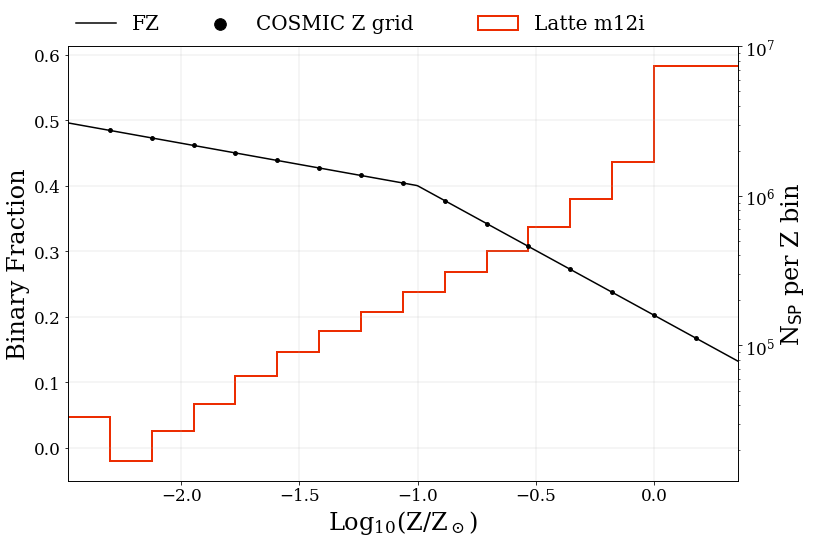

In [20]:
viz.plot_FIRE_F_NSP(FIRE_path, met_arr)

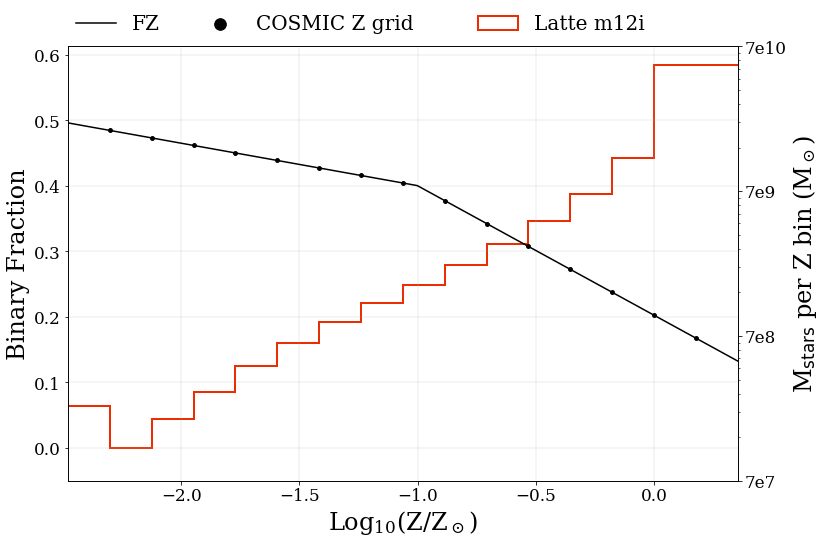

In [21]:
viz.plot_FIRE_F_mass(FIRE_path, met_arr, save=True)

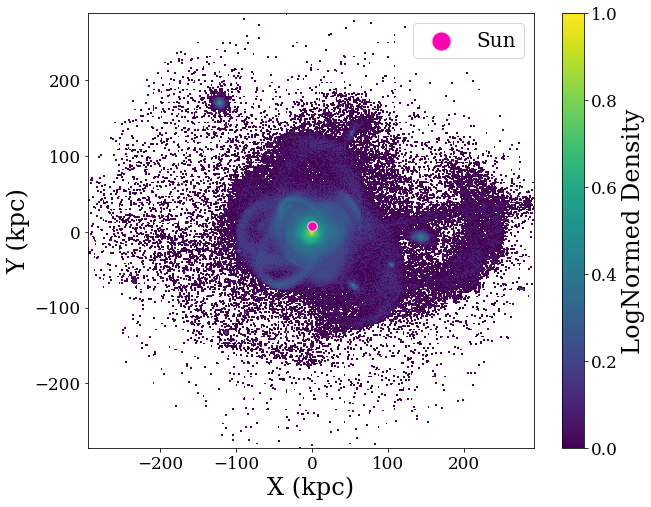

In [22]:
viz.plot_FIREpos(FIRE_path)

## Formation Efficiency:

#### Plot data:

()

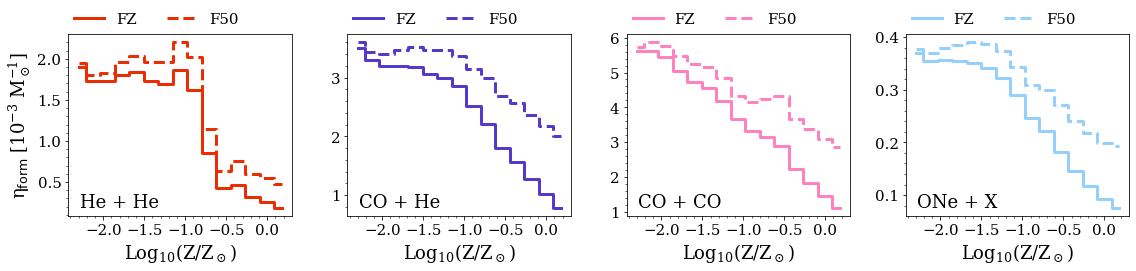

In [10]:
DWDeff = pd.read_hdf(plotdat_path + 'DWDeff_FZ.hdf', key='data')
effHe = DWDeff.He.values
effCOHe = DWDeff.COHe.values
effCO = DWDeff.CO.values
effONe = DWDeff.ONe.values

DWDeff05 = pd.read_hdf(plotdat_path + 'DWDeff_F50.hdf', key='data')
effHe05 = DWDeff05.He.values
effCOHe05 = DWDeff05.COHe.values
effCO05 = DWDeff05.CO.values
effONe05 = DWDeff05.ONe.values

viz.plot_formeff(effHe, effHe05, effCOHe, effCOHe05, effCO, effCO05, effONe, effONe05, save=True)

## Interaction Separation:

Can plot either first instance of CE or first instance of RLOF by specifying "whichsep". These are usually the same though!

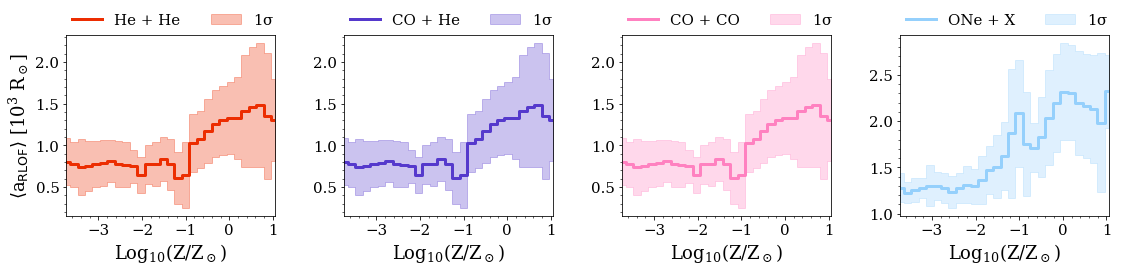

In [12]:
Heinter = pd.read_hdf(plotdat_path+'11_11_intersep_FZ.hdf', key='data')
COHeinter = pd.read_hdf(plotdat_path+'11_11_intersep_FZ.hdf', key='data')
COinter = pd.read_hdf(plotdat_path+'11_11_intersep_FZ.hdf', key='data')
ONeinter = pd.read_hdf(plotdat_path+'12_intersep_FZ.hdf', key='data')

viz.plot_intersep(Heinter, COHeinter, COinter, ONeinter, whichsep='CEsep', save=True)

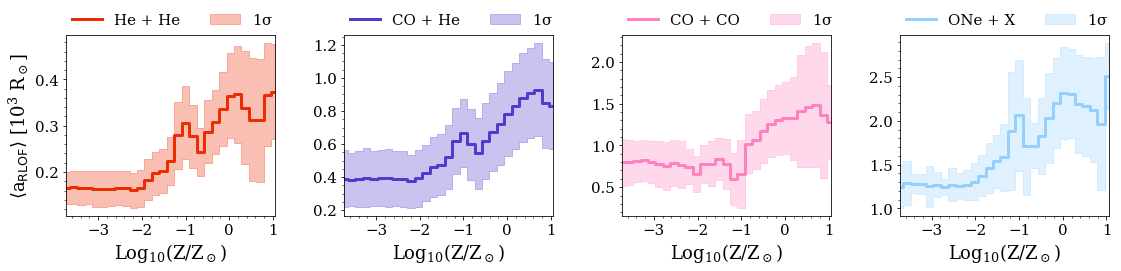

In [12]:
Heinter = pd.read_hdf(plotdat_path+'10_10_intersep_F50.hdf', key='data')
COHeinter = pd.read_hdf(plotdat_path+'11_10_intersep_F50.hdf', key='data')
COinter = pd.read_hdf(plotdat_path+'11_11_intersep_F50.hdf', key='data')
ONeinter = pd.read_hdf(plotdat_path+'12_intersep_F50.hdf', key='data')

viz.plot_intersep(Heinter, COHeinter, COinter, ONeinter, whichsep='CEsep')

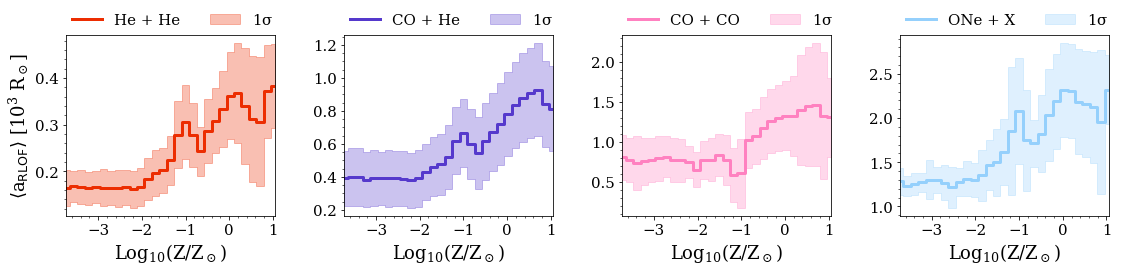

In [13]:
Heinter = pd.read_hdf(plotdat_path+'10_10_intersep_FZ.hdf', key='data')
COHeinter = pd.read_hdf(plotdat_path+'11_10_intersep_FZ.hdf', key='data')
COinter = pd.read_hdf(plotdat_path+'11_11_intersep_FZ.hdf', key='data')
ONeinter = pd.read_hdf(plotdat_path+'12_intersep_FZ.hdf', key='data')

viz.plot_intersep(Heinter, COHeinter, COinter, ONeinter, whichsep='RLOFsep')

## Number of LISA systems:

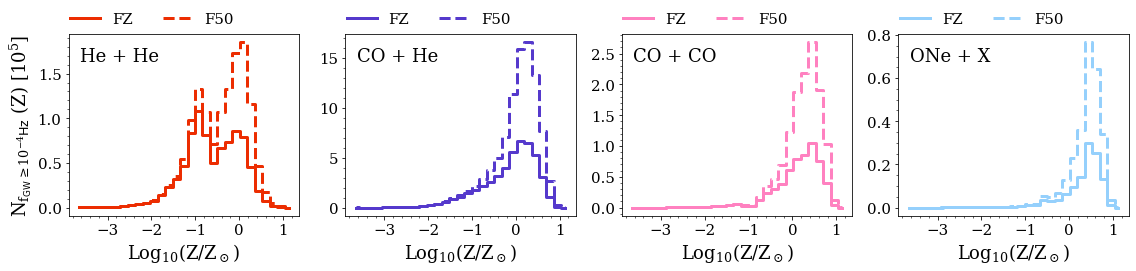

In [13]:
numsFZ = pd.read_hdf(plotdat_path+'numLISA_30bins_FZ.hdf', key='data')
numsF50 = pd.read_hdf(plotdat_path+'numLISA_30bins_F50.hdf', key='data')
viz.make_numLISAplot(numsFZ, numsF50, save=True)

## LISA Properties

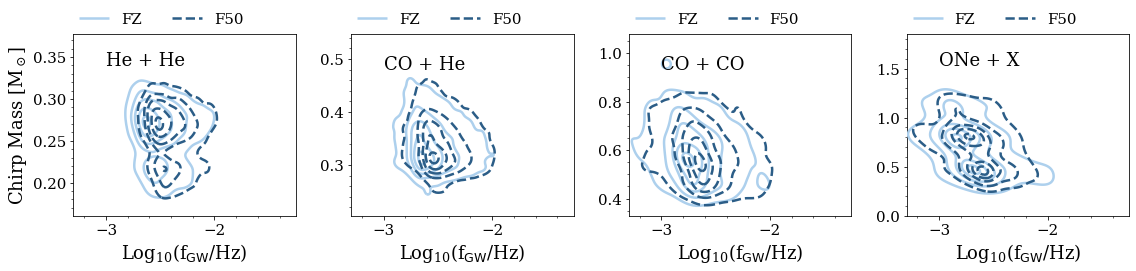

In [15]:
viz.make_Mc_f_gw_plot_total(plotdat_path, save=True)

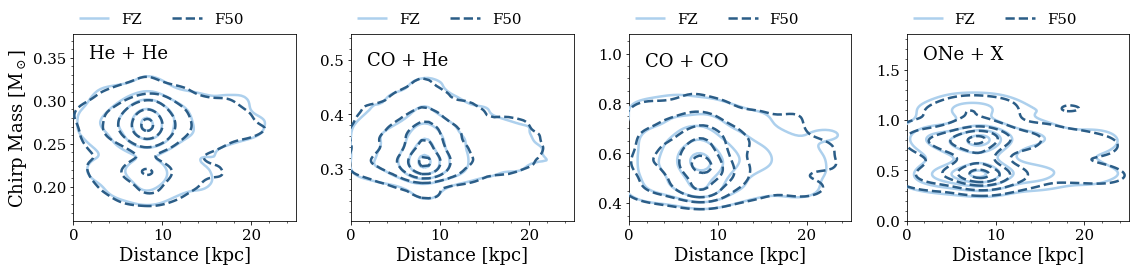

In [16]:
viz.make_Mc_dist_plot_total(plotdat_path, save=True)

### SNR plots

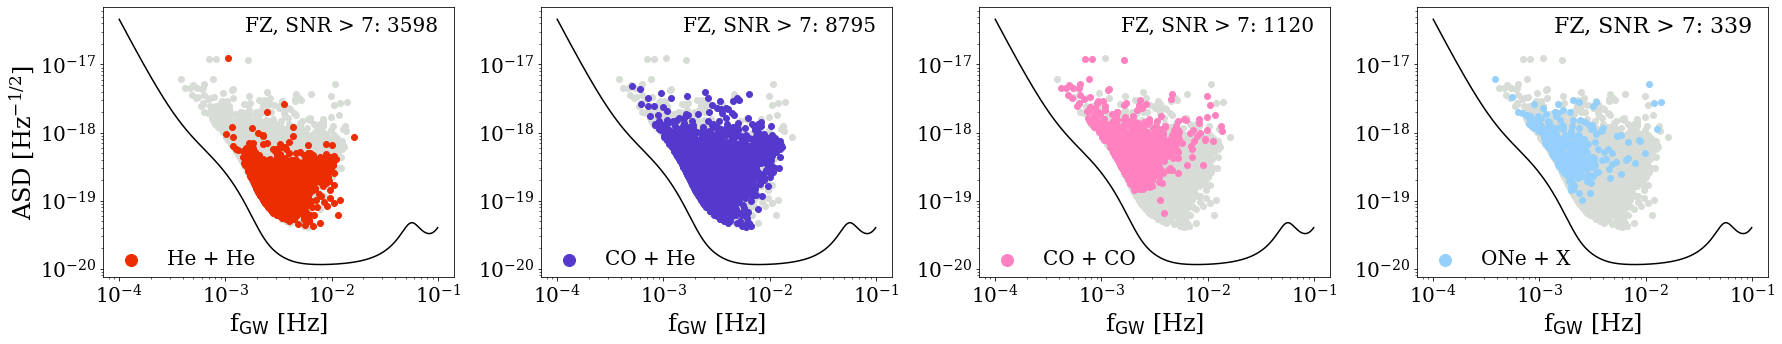

In [17]:
viz.plot_LISAcurves(pathtodat=plotdat_path, model='FZ', save=True)

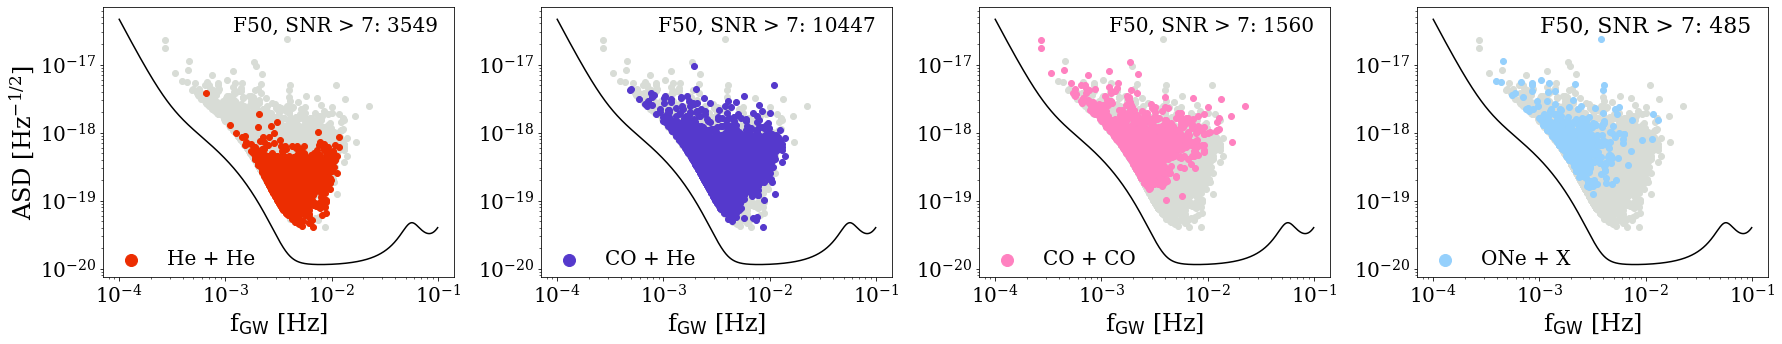

In [18]:
viz.plot_LISAcurves(pathtodat=plotdat_path, model='F50', save=True)

### LISA confusion foreground 

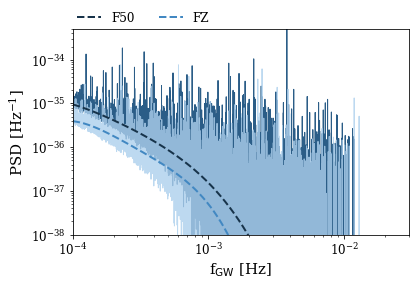

In [19]:
viz.plot_foreground(pathtodat=plotdat_path, save=True)

## If you have created other populations with binary evolution assumption variations, you can plot them for comparison using plot_model_var() and plot_model_var_conf()

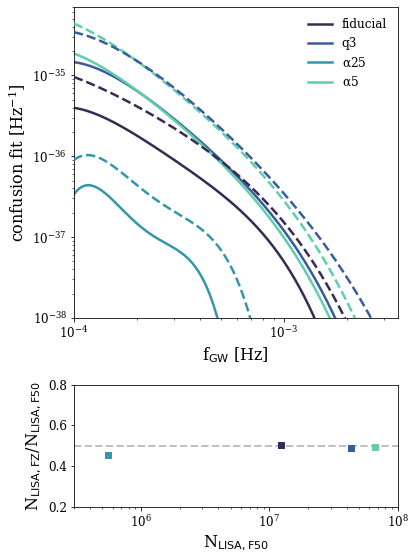

In [5]:
viz.plot_model_var(pathtodat = '~/ceph/DWD_', save=True)


<ipython-input-14-21769aa6e6ee>:65: RuntimeWarning: invalid value encountered in true_divide
  np.linspace(1e-4, 1e-1, 100000), np.abs(conf_fit_FZ - conf_fit_F50)/(conf_fit_F50), color=colors[ii], ls='--', lw=2, label=model_names[ii]


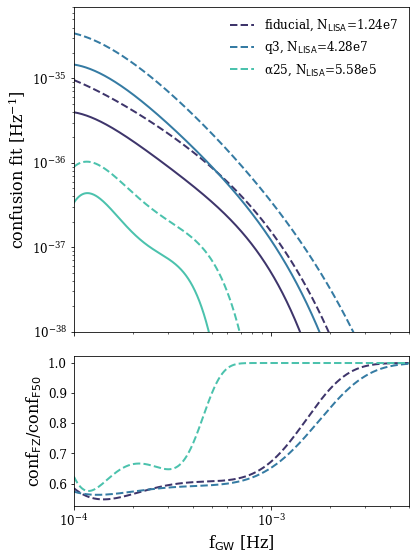

In [14]:
pathtodat = '~/ceph/DWD_'
models = ['log_uniform', 'qcflag_4', 'alpha_0.25']
model_names = [r'fiducial, N$_{\rm{LISA}}$=1.24e7', r'q3, N$_{\rm{LISA}}$=4.28e7', r'$\alpha25$, N$_{\rm{LISA}}$=5.58e5']#, r'Standard, $\alpha5$']

plot_model_var_2(pathtodat, save=True)